<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Learning_Pytorch/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Comuter Vision

- Anything that can described in a visual sense can be a potential computer vision problem.

# Workflow 

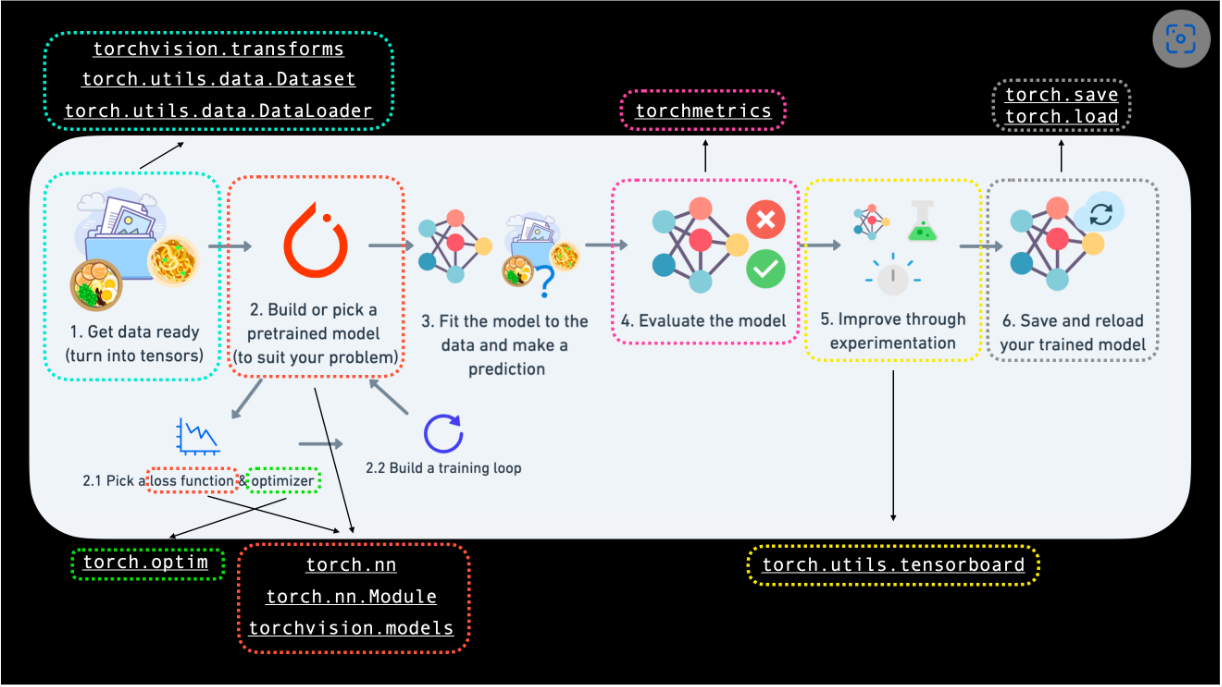

# Importing Libraries

In [2]:
import torch 
from torch import nn 

# Torchvision
import torchvision 
from torchvision import datasets 
from torchvision.transforms import ToTensor # Convert a PIL Image or ndarray to tensor and scale the values accordingly.

import matplotlib.pyplot as plt

# Checking versions

print(F"PyTorch versrion : {torch.__version__}")
print(F"TorchVision version : {torchvision.__version__}")

PyTorch versrion : 2.0.0+cu118
TorchVision version : 0.15.1+cu118


# Dataset 

**Fashion MNIST**

- **Multiclass Classification** 

- 10 image classes ( different types of clothing ) 


In [3]:
# Setting up training and Test data 

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None, 
)

# Testing Data 
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26421880/26421880 [00:02<00:00, 12372856.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210404.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3932410.77it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22145925.12it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# training sample 
image, label = train_data[0]
print(F"image: {image} \n \n label : {label}")


image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

# EDA

## Data Size

In [5]:
# Input and Output shapes of data 
image.shape

torch.Size([1, 28, 28])

Image is 28X28 pixels

- 
The shape of the image tensor is [1, 28, 28] or more specifically:

    `[color_channels=1, height=28, width=28]`

- Color channel = GreyScale (1) 

- Data in `NCHW` format, but, `NHWC` better in PyTorch 

In [6]:
# Data Shape 

len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

`60000` Training Samples and `10000` Test Samples 

Number of `Classes`

In [7]:
class_names  = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Problem is ***Multi-Class Classification***

## DataViz

Image shape: torch.Size([1, 28, 28])


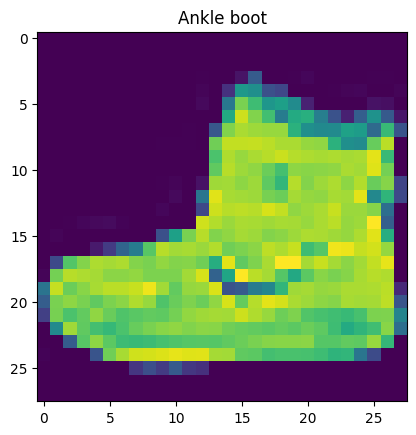

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(class_names[label]);

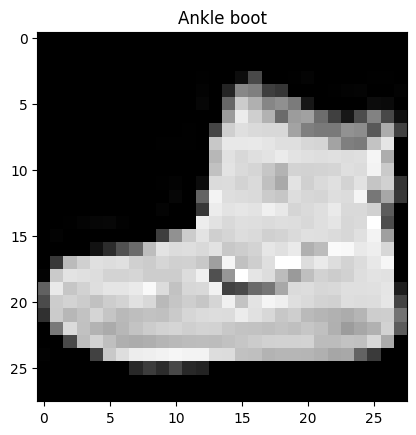

In [9]:
# GreyScale 

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Multiplot 

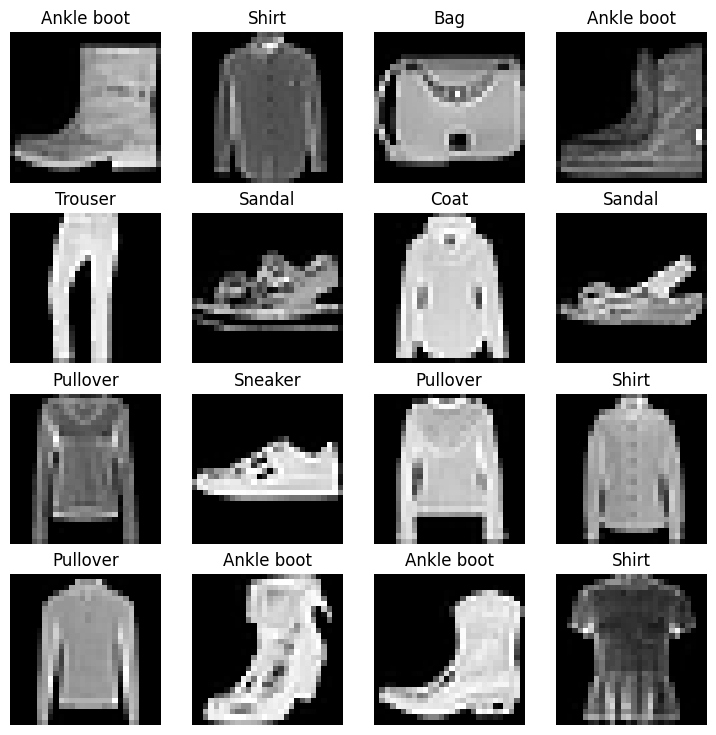

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# DataLoader

prepare the Dataset with a `torch.utils.data.DataLoader` or `DataLoader` for short.

Converts datasets into `mini-batches`

`Dataset` stores the `samples` and their corresponding `labels`, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.




In [11]:
# Crearting DataLoader 

from torch.utils.data import DataLoader

# Batch-size Hyperparameter 

BATCH_SIZE = 32

# turining data into iterables ( Batches )

train_dataloader = DataLoader(
    dataset=train_data, # dataset to be turned into an iterable 
    batch_size=BATCH_SIZE, # How many samples per batch 
    shuffle=True, # shuffle data after every epoch ?
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f81744541c0>, <torch.utils.data.dataloader.DataLoader object at 0x7f8174454400>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# What is inside training Dataloader 

train_features_batch, train_labels_batch = next(iter(train_dataloader))
# is used to extract a batch of data from a PyTorch dataloader.



Checking a single sample to verify the data

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


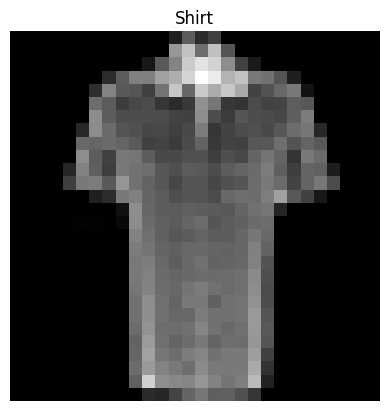

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() 
                    # In PyTorch, the item() method is used to retrieve 
                    # the value of a tensor as a standard Python scalar. 
                    # It is typically used when you have a tensor with a single element, 
                    # such as a tensor representing a loss value or a single prediction.

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 5. Setting device agnostic code 

In [14]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Baseline Model 

**Model 0**

- To set a baseline performance and improve upon it subsequently 

## Setting up Model

In [15]:
# Flatening the input

# nn.Flatten() compresses the dimensions of a tensor into a single vector.

flatten_model = nn.Flatten()    # all nn modules function as a model, 
                                # ie can do a forward pass 
# Getting a single sample 

x = train_features_batch[0]

# Flattening the sample 
output = flatten_model(x) # forward pass 

# Printing output 

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Now turned the pixel data from height and width dimensions into one long feature vector.

`nn.Linear` likes its inputs in form of feature vectors 

In [16]:
# Model 0
# Simple Linear Model 


from torch import nn
from torch.nn.modules.linear import Linear

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)



In [17]:
# Instantiate the Model 

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names),
).to("cpu")

print(model_0)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


## Loss, Optimizer and Evaluation Metrics

In [18]:
# Importing from previous modules 

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
# Backup accuracy 
from helper_functions import accuracy_fn

In [20]:
# Accuracy 

try:
    from torchmetrics import Accuracy 
except:
    !pip install torchmetrics
    from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass",
                    num_classes=len(class_names),
                    )

print(accuracy)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 13.8 MB/s eta 0:00:00
MulticlassAccuracy()


In [21]:
# Loss Function
loss_fn = nn.CrossEntropyLoss() # This criterion computes the cross entropy loss
                                # between input logits and target.

print(loss_fn)

CrossEntropyLoss()


In [22]:
# Optimizer 
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Timing the experiments 

In [23]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Training 

Extra loop inside training loop required to go through the batches 
- `loss` and `eval metrics` would be calculated on per batch, instead of whole dataset . 

--------------------------
 1. Loop through epochs.
 2. Loop through training batches, perform training steps, calculate the train loss per batch.
 3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
 4. Print out what's happening.

 -------------------------

In [24]:
# for progress bar
from tqdm.auto import trange, tqdm 

# Training Loop 
# Start seed 

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Number of Epochs 
epochs = 3

# Training and testing loop

for epoch in tqdm(range(epochs)):
    print(F"Epoch: {epoch}\n------")

    # Training 
    train_loss = 0

    # loop to loop through the batches 
    for batch, (X,y) in tqdm(enumerate(train_dataloader)):    # enumerate() is a built-in function in Python 
                                                        # that allows you to iterate over a sequence 
                                                        # while keeping track of the index of each element. 
                                                        # It takes an iterable (such as a list, tuple, or string) 
                                                        # as input and returns an iterator that generates 
                                                        # pairs of index and corresponding elements.
        model_0.train()

        # 1. Forward Pass 
        y_pred = model_0(X) # output logits  

        # 2. Calculate the loss 
        loss = loss_fn(y_pred, y) # loss for this specific batch
                                  # input logits 
        train_loss += loss # accumulate loss per epoch 

        # 3. Optimizer Zero grad
        optimizer.zero_grad()

        # 4. Loss baclward 
        loss.backward() # Backprop adone per batch 

        # 5.Optimizer step
        optimizer.step()

        # print out how many batches sample have seen
        if batch%400 == 0:
            print(F"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} sampples")

    # Average loss per batch, per epoch 
    # Divide total train loss by length of train dataloader 

    train_loss /= len(train_dataloader)

    # Testing 

    test_loss, test_acc = 0,0
    model_0.eval()

    with torch.inference_mode():
        for X,y in tqdm(test_dataloader):
            
            # 1. Forward Pass
            test_pred = model_0(X)

            # 2. Calculate loss ( accumutively )
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate Accuracy 
                                    # ( preds need to be same as y_true 
                                    # if using accuracy_fn from helper file
                                    # if using torchmetrics accuracy, 
                                    # from docs : 
                                    # preds (Tensor): An int tensor of shape (N, ...) or 
                                    # float tensor of shape (N, C, ..). 
                                    # If preds is a floating point we apply torch.argmax 
                                    # along the C dimension to automatically convert probabilities/logits into an int tensor. )
                                    # target (Tensor): An int tensor of shape (N, ...)

            test_acc += accuracy(preds=test_pred, target=y )
            #test_acc += accuracy(preds=test_pred.argmax(dim=1), target=y ) # this should work too 
            #test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # jsut to test output accuracy format in %
                                                                                # Found the bug
                                                                                # if accuracy_fn be used, the accuracy is being multiplided by 
                                                                                # a factor of 100 in origical code implementation
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of the test dataloader ( per batch )
        test_acc /= len(test_dataloader)

    ## print out whats happening 
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.4f}\n")
    
# Calculate Training time 

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------


0it [00:00, ?it/s]

Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.59484 | Test loss: 0.51635, Test acc: 0.8184

Epoch: 1
------


0it [00:00, ?it/s]

Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.47741 | Test loss: 0.53392, Test acc: 0.8141

Epoch: 2
------


0it [00:00, ?it/s]

Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45552 | Test loss: 0.51638, Test acc: 0.8291

Train time on cpu: 43.540 seconds


# 4. Model Evaluation 


We're going to be building a few models, create some function to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a DataLoader, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the DataLoader and then we can evaluate those predictions using the loss function and accuracy function.

In [25]:
torch.manual_seed(42)
# make device agnostic

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy,
               device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.
    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader: # using 32 images as a batch
            
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            # Making predictions
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            accuracy.to(device) 
            acc += accuracy(preds=y_pred, target=y)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader) 

    return {"model_name": model.__class__.__name__ , # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc" : acc.item(), 
            } 
print(eval_model)

<function eval_model at 0x7f8176974160>


In [26]:
# Evaluating Model 0 
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy=accuracy)
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.516375720500946, 'model_acc': 0.8290734887123108}


# 6. Adding Non-Linearity

## Model 1

In [27]:
# Non-Linear model with ReLU 

import torch
from torch import nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [28]:
# Instantiating the Model 

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

## Loss, Optimizer and Eval metrics

In [29]:
# Accuracy 

try:
    from torchmetrics import Accuracy 
except:
    !pip install torchmetrics
    from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass",
                    num_classes=len(class_names),
                    )

print(accuracy)

# Loss
loss_fn = nn.CrossEntropyLoss()
print(loss_fn)

# Optimizer 

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
print(optimizer)

MulticlassAccuracy()
CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Functionizing trainind and test loops 

For the training loop create a function called `train_step()` which takes in a `model`, a `DataLoader` a `loss function` and an `optimizer`.

The `testing` loop will be similar but it'll be called `test_step()` and it'll take in a `model`, a `DataLoader`, a `loss function` and an `evaluation function`

In [30]:
# Training Step
from tqdm.auto import tqdm 

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy,
               device: torch.device = device,
               ):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()

    for batch, (X, y) in tqdm(enumerate(data_loader)):
        
        # Sending data to GPU
        X,y = X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred = model(X) # calculate logits 

        # 2. Calculate the loss 
        loss = loss_fn(y_pred, y) # loss for this specific batch
                                  # input logits 
        train_loss += loss # accumulate loss per epoch
        accuracy.to(device) 
        train_acc += accuracy(target=y, preds=y_pred)

        # 3. Optimizer Zero grad
        optimizer.zero_grad()

        # 4. Loss baclward 
        loss.backward() # Backprop adone per batch 

        # 5.Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.3f}")



In [31]:
# Testing Step 
from tqdm.auto import tqdm

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy,
              device: torch.device = device,
              ):
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode

    
    with torch.inference_mode(): # Turn on inference context manager
        for X, y in tqdm(data_loader):

            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            
            test_loss += loss_fn(test_pred, y)
            accuracy.to(device) 
            test_acc += accuracy(target=y, preds=test_pred)
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:3f}\n")

## Training Loop 

In [32]:
torch.manual_seed(42)

# Measure time

from timeit import default_timer as timer 
train_time_start_on_gpu = timer()
from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epochs)):
    print(F"Epoch: {epoch} \n------------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy=accuracy,
               )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy=accuracy,
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------------


0it [00:00, ?it/s]

Train loss: 1.09199 | Train accuracy: 0.613


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.95636 | Test accuracy: 0.649960

Epoch: 1 
------------


0it [00:00, ?it/s]

Train loss: 0.73779 | Train accuracy: 0.737


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.72300 | Test accuracy: 0.742412

Epoch: 2 
------------


0it [00:00, ?it/s]

Train loss: 0.66776 | Train accuracy: 0.761


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.68743 | Test accuracy: 0.756589

Train time on cuda: 53.127 seconds


## Evaluation

In [33]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy=accuracy,
                             device=device,)
print(model_1_results)

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6874349117279053, 'model_acc': 0.7565894722938538}


In [34]:
# Baseline results : 
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.516375720500946, 'model_acc': 0.8290734887123108}


Model 1 is worse than baseline model 0 

# 7. CNN Model

 Structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

## Model 2

**Model Architecture**

[TinyVGG](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

In [35]:
# Creating a Convolutional Neural Network
# Network Architecture from TinyVGG

import torch
from torch import nn 

class FashionMNISTModelV2(nn.Module):

    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, #default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
                                    )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,1,1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
                                     )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
                                        )
        
    def forward(self,x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x

In [36]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Stepping thorugh nn.Conv2d()

In [37]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [38]:
# toy Conv2d

torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)   # also try using "valid" or "same" here 
                                    # padding=0 and padding="valid" both mean no padding is applied, 
                                    # while padding="same" adds padding symmetrically 
                                    # to preserve the spatial dimensions of the input. 

                                    

# Pass the data through the convolutional layer
conv_layer(test_image)  # Note: If running PyTorch <1.11.0, 
                        # this will error because of shape issues 
                        #(nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [39]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [40]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

 we get different channel sizes as well as different pixel sizes.

Now changing Convlution layer 

In [41]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

Data goes in and the layers try to update their internal parameters (patterns) to lower the `loss function` thanks to some help of the `optimizer`.

In [42]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [43]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## Stepping thought nn.MaxPool2d()

In [44]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


The kernel_size of the `nn.MaxPool2d()` layer will effects the size of the output shape.

In [45]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


**Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.**

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, *lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information*.

It is the same story for a `nn.Conv2d()` layer.

Except instead of just taking the maximum, the `nn.Conv2d()` performs a convolutional operation on the data

## Loss, optimizer and Accuracy

In [46]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)
try:
    from torchmetrics import Accuracy 
except:
    !pip install torchmetrics
    from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass",
                    num_classes=len(class_names),
                    )

## Training and testing model_2

In [47]:
torch.manual_seed(42)
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy=accuracy,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy=accuracy,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


0it [00:00, ?it/s]

Train loss: 0.59435 | Train accuracy: 0.785


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.39568 | Test accuracy: 0.856130

Epoch: 1
---------


0it [00:00, ?it/s]

Train loss: 0.36179 | Train accuracy: 0.868


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.39619 | Test accuracy: 0.859625

Epoch: 2
---------


0it [00:00, ?it/s]

Train loss: 0.32433 | Train accuracy: 0.884


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.33561 | Test accuracy: 0.876897

Train time on cuda: 74.668 seconds


In [48]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy=accuracy
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33560821413993835,
 'model_acc': 0.8768969774246216}

# 8. Comparing different results 

In [49]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.516376,0.829073
1,FashionMNISTModelV1,0.687435,0.756589
2,FashionMNISTModelV2,0.335608,0.876897


In [50]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.516376,0.829073,43.539724
1,FashionMNISTModelV1,0.687435,0.756589,53.126811
2,FashionMNISTModelV2,0.335608,0.876897,74.668262


**performance-speed tradeoff.**

Generally, you get better performance out of a larger, more complex model (like we did with model_2).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

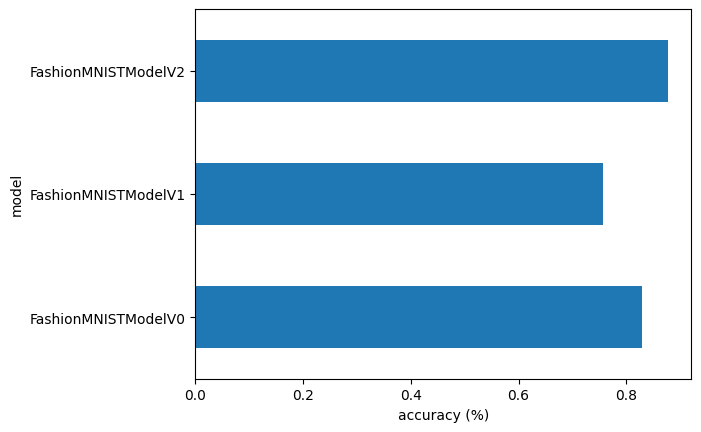

In [51]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# 9. Make and evaluate random predictions with best model

To do so, let's create a function make_predictions() where we can pass the model and some data for it to predict on.

In [52]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):

    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            #Prepare sample 
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward Pass, get raw logit 
            pred_logit = model(sample)

            # Prediction probability 
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [53]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [54]:
len(test_samples)

9

In [55]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
print(torch.round(pred_probs[:2], decimals=3))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9970, 0.0000, 0.0010, 0.0000,
         0.0020],
        [0.0170, 0.8980, 0.0000, 0.0560, 0.0100, 0.0000, 0.0180, 0.0000, 0.0000,
         0.0000]])


In [56]:
pred_probs.shape

torch.Size([9, 10])

In [57]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [58]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]))

In [59]:
a = torch.eq(torch.Tensor(test_labels), pred_classes)
print(a)
print(a.sum()/len(a))

tensor([ True,  True,  True, False,  True,  True,  True,  True,  True])
tensor(0.8889)


Got the same as our accuracy 

### Vizualize results 

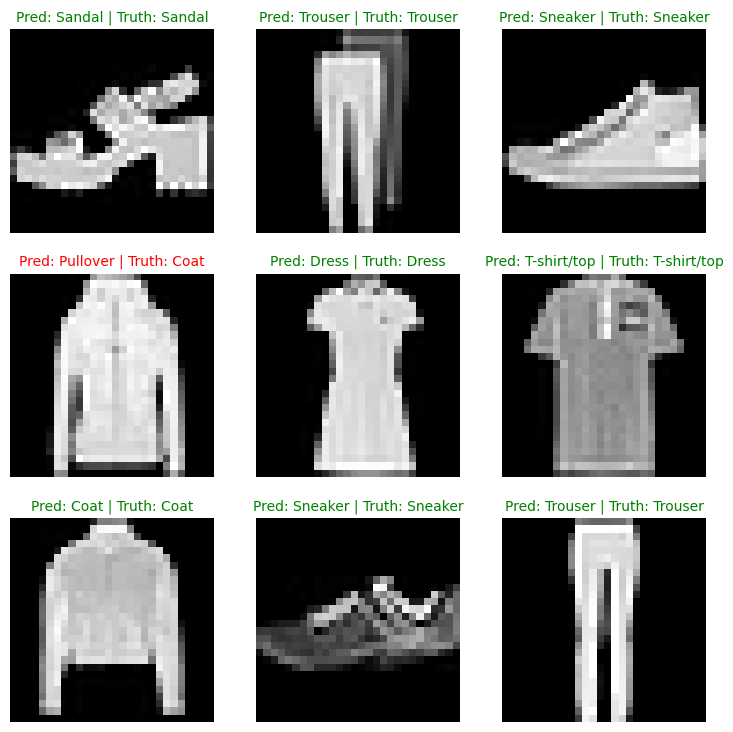

In [60]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# 10. Making a confusion matrix for further prediction evaluation

To make a confusion matrix, we'll go through three steps:

- Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
- Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
- Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.


In [61]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [62]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.0 MB/s eta 0:00:00
mlxtend version: 0.14.0


Plotting Confusion Matrix 

- First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many `classes` we're dealing with by setting `num_classes=len(class_names)`.

- Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

- Finally we can plot our confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

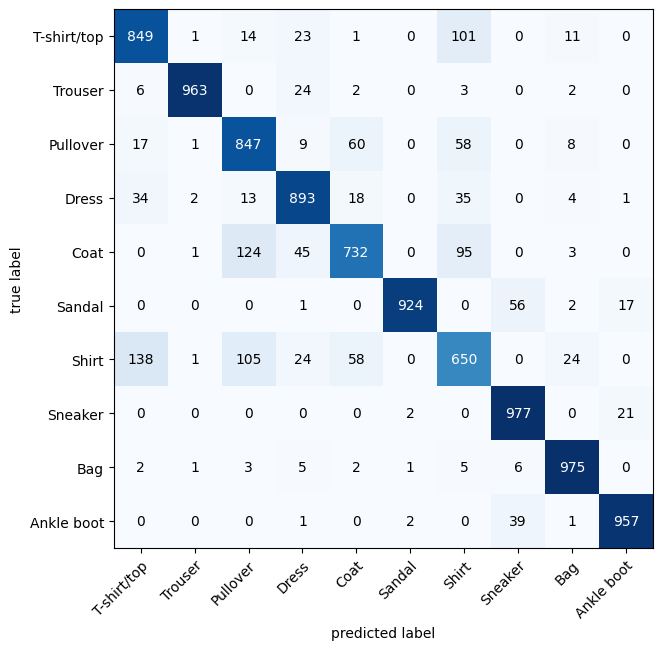

In [67]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix 

#  Setup confusion matrix instance and compare predictions to targets

confmat = ConfusionMatrix(num_classes=len(class_names), 
                          task="multiclass")

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plotting 
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

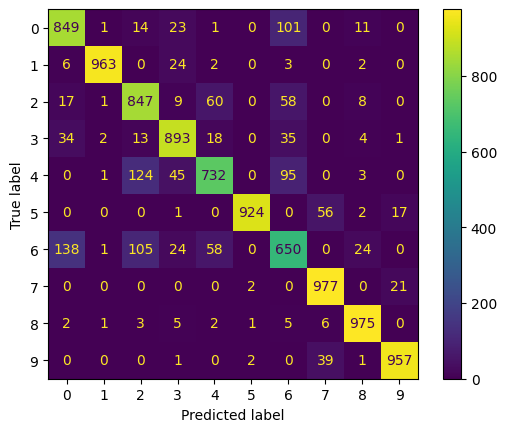

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_data.targets, y_pred_tensor)
plt.show()